In [1]:
#import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in files

accident_data = "./accident.csv"

In [3]:
#read CSV file and review columns
accidents = pd.read_csv(accident_data)

accidents.columns

Index(['index', 'accident_id', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
       'PERSONS', 'COUNTY', 'county_name', 'CITY', 'city_name', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'NHS', 'FUNC_SYS', 'func_sys_lit', 'ROAD_FNC',
       'road_fnc_lit', 'RD_OWNER', 'rd_owner_lit', 'TWAY_ID', 'TWAY_ID2',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'sp_jur_lit', 'HARM_EV',
       'harm_ev_lit', 'MAN_COLL', 'man_coll_lit', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'lgt_cond_lit',
       'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'cf1_lit',
       'cf2_lit', 'cf3_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DR

In [20]:
#determine how many accidents have the type of roadway specified

#create new dataframe with only columns being reviewed
reduced_df = pd.DataFrame(accidents[['accident_id', 'road_fnc_lit', 'man_coll_lit', 'FATALS', 'weather_lit']])

#filter out any unknowns or cells with only "." listed

intersection_type = reduced_df[reduced_df['road_fnc_lit'].str.contains('Unknown|\\.') == False] 


intersection_type.count()


accident_id     1087
road_fnc_lit    1087
man_coll_lit    1087
FATALS          1087
weather_lit     1087
dtype: int64

In [22]:
#rename columns to be more readable

intersection_type = intersection_type.rename(columns={'accident_id': 'Accident ID', 'road_fnc_lit': 'Intersection Type', 'man_coll_lit': 'Accident Type', 
                                               'FATALS': 'Fatalities', 'weather_lit': 'Weather Conditions'})

intersection_type

,Accident ID,Intersection Type,Accident Type,Fatalities,Weather Conditions
0,2012040001,Urban-Local Road or Street,Not a Collision with Motor Vehicle In-Transport,1,Clear
1,2012040002,Rural-Major Collector,Not a Collision with Motor Vehicle In-Transport,1,Cloudy
2,2012040003,Urban-Collector,Not a Collision with Motor Vehicle In-Transport,1,Clear
3,2012040004,Urban-Collector,Angle,1,Clear
4,2012040005,Rural-Major Collector,Not a Collision with Motor Vehicle In-Transport,1,Clear
...,...,...,...,...,...
1105,2014040718,Rural-Minor Collector,Not a Collision with Motor Vehicle In-Transport,1,Clear
1107,2014040722,Urban-Minor Arterial,Unknown,1,Unknown
1108,2014040725,Rural-Local Road or Street,Not a Collision with Motor Vehicle In-Transport,1,Unknown
1110,2014040727,Rural-Major Collector,Not a Collision with Motor Vehicle In-Transport,1,Unknown


In [24]:
#determine the total # of accidents in each intersection type in order to figure out which intersection layout has the most accidents

most_accidents = intersection_type.groupby('Intersection Type')['Accident ID'].count()

most_accidents

Intersection Type
Rural-Local Road or Street    161
Rural-Major Collector         190
Rural-Minor Arterial          102
Rural-Minor Collector          38
Urban-Collector               133
Urban-Local Road or Street    148
Urban-Minor Arterial          315
Name: Accident ID, dtype: int64

Text(0.5, 1.0, 'Total # of Accidents Per Intersection Type')

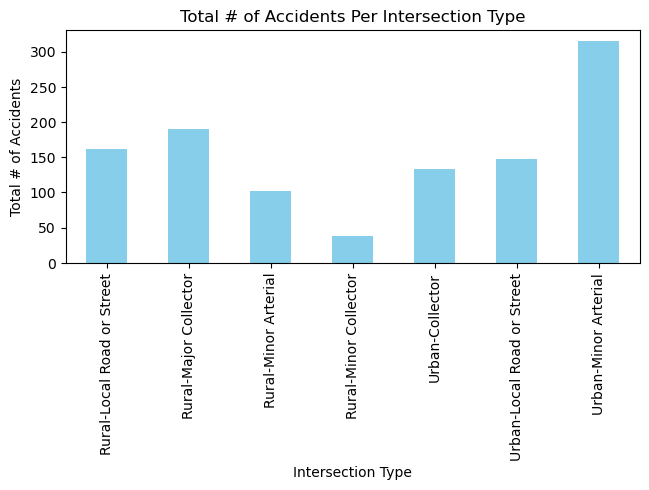

In [36]:
#prepare a chart showing the total accidents for each intersection type

most_accidents.plot(kind='bar', color='skyblue')
plt.tight_layout()
plt.ylabel('Total # of Accidents')
plt.title('Total # of Accidents Per Intersection Type')

In [40]:
#review the total # of fatalities within each intersection type

intersection_type.groupby('Intersection Type')['Fatalities'].sum()

#Urban-Minor Arterial roadways also have the highest # of fatalities within the dataset. 

Intersection Type
Rural-Local Road or Street    173
Rural-Major Collector         223
Rural-Minor Arterial          128
Rural-Minor Collector          42
Urban-Collector               145
Urban-Local Road or Street    152
Urban-Minor Arterial          330
Name: Fatalities, dtype: int64